In [44]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [45]:
def load_data(filepath):
    if file_path[-3:] == 'csv':
        return pd.read_csv(file_path)
    elif file_path[-3:] == 'txt':
        return pd.read_csv(file_path, delimiter='\t')
    elif file_path[-4:] == 'json':
        return pd.read_json(file_path)
    elif file_path[-4:] == 'xlsx':
        return pd.read_excel(file_path)
    else:
        print("An error occured, use ['csv', 'xlsx', 'txt', 'json'] files only")

In [46]:
file_path = r"C:\Users\Atharva\Desktop\rxib\ML Projects\Machine Learning Projects_Desktop\Loan Prediction\train_u6lujuX_CVtuZ9i (1).csv"
df = load_data(file_path)
df.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


In [47]:
def view_data(df):
    print("First 5 rows of the data:")
    display(df.head())
    
    print("Shape of the data:")
    display(df.shape)
    
    print("Statistical description of the data")
    display(df.describe())
    
    print("Information of the data")
    display(df.info())
    
    print("Null Values in the data")
    display(df.isna().sum())

In [48]:
def remove_id_col(df, id_cols):
    df.drop(id_cols, axis =1,inplace = True)

In [49]:
def encode_target_col(df, target, pos_class):
    df[target] = np.where(df[target]==pos_class,1,0)

In [50]:
encode_target_col(df, 'Loan_Status', 'Y')

In [51]:
remove_id_col(df, 'Loan_ID')

In [52]:
def fill_na(df, num_meth, cat_meth):
    # Get numeric columns
    num_cols = df.select_dtypes(include=['int', 'float']).columns.to_list()

    # Handle numeric columns based on the specified method
    if num_meth == 'mean':
        for col in num_cols:
            if df[col].isna().sum() > 0:
                df[col] = df[col].fillna(df[col].mean())

    elif num_meth == 'median':
        for col in num_cols:
            if df[col].isna().sum() > 0:
                df[col] = df[col].fillna(df[col].median())

    elif num_meth == 'interpolate':
        for col in num_cols:
            if df[col].isna().sum() > 0:
                df[col] = df[col].interpolate(method='linear')

    else:
        print("Select num_meth from: ['mean', 'median', 'interpolate']")

    # Get categorical columns
    cat_cols = df.select_dtypes(include=['object', 'category']).columns.to_list()

    # Handle categorical columns based on the specified method
    if cat_meth == 'mode':
        for col in cat_cols:
            if df[col].isna().sum() > 0:
                df[col] = df[col].fillna(df[col].mode()[0])

    else:
        print('Select cat_meth as "mode"')

    print("After Filling Null Values:")
    print(df.isna().sum())

In [53]:
def drop_cols(df, cols_to_remove):
    df.drop(cols_to_remove, axis=1)

In [54]:
def change_dtype(df, 
                 to_int_list = None,to_float_list = None,
                 to_obj_list = None,to_cat_list = None,
                 to_bool_list = None,to_dt_list = None):
    
    if to_int_list!= None:
        for i in to_int_list:
            df[i] = df[i].astype('int')
    if to_float_list!= None:
        for i in to_float_list:
            df[i] = df[i].astype('float')
    if to_obj_list!= None:
        for i in to_obj_list:
            df[i] = df[i].astype('object')
    if to_cat_list!= None:
        for i in to_cat_list:
            df[i] = df[i].astype('category')
    if to_bool_list!= None:
        for i in to_bool_list:
            df[i] = df[i].astype('bool')
    if to_dt_list!= None:
        for i in to_dt_list:
            df[i] = pd.to_datetime(df[i])

In [55]:
def group_cols_by_dtype(df):
    num_cols, cat_cols, dt_cols, bool_cols = [], [], [], []
    
    num_cols.append(df.select_dtypes(include=['int', 'float']).columns.to_list())
    cat_cols.append(df.select_dtypes(include=['object', 'category']).columns.to_list())
    dt_cols.append(df.select_dtypes(include=['datetime']).columns.to_list())
    bool_cols.append(df.select_dtypes(include=['bool']).columns.to_list())
    
    return num_cols, cat_cols, dt_cols, bool_cols

In [56]:
def drop_duplicates(df):
    df = df.drop_duplicates()

In [57]:
def visualize_num_features(df):
    num_cols = group_cols_by_dtype(df)[0][0]
    print("Histogram for Numerical Features")
    df[num_cols].hist(figsize = (20,10), bins=50);
    plt.show();

In [58]:
def visualize_cat_features(df):
    cat_cols = group_cols_by_dtype(df)[1][0]
    for i in cat_cols:
        sns.displot(df[i]);

In [59]:
def crosstabs(df, target):
    cat_cols = group_cols_by_dtype(df)[1][0]
    if target in cat_cols:
        cat_cols.remove(target)
    print(cat_cols)
    for i in cat_cols:
        print("Crosstab between", i, "&", target)
        display(pd.crosstab(df[i], df[target]))

In [60]:
# WOE for Cat

In [61]:
# WOE for Num

In [62]:
def split_data_into_X_y(df, target):
    X = df.drop(target,axis=1)
    y = df[target]
    
    return X,y

In [63]:
def train_test_split_data(df, target):
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, 
                                                        test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [64]:
numcols = group_cols_by_dtype(df)[0][0]
numcols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Loan_Status']

In [65]:
def feature_engineer_num_cols(X_train, X_test, method, target):
    from sklearn.preprocessing import MinMaxScaler, StandardScaler
    
    if method == 'MinMaxScaler':
        scaler = MinMaxScaler()
        numcols = group_cols_by_dtype(df)[0][0]
        if target in numcols:
            numcols.remove(target)
            X_train[numcols] = scaler.fit_transform(X_train[numcols])
            X_test[numcols] = scaler.transform(X_test[numcols])
            
    if method == 'StandardScaler':
        scaler = StandardScaler()
        numcols = group_cols_by_dtype(df)[0][0]
        if target in numcols:
            numcols.remove(target)
            X_train[numcols] = scaler.fit_transform(X_train[numcols])
            X_test[numcols] = scaler.transform(X_test[numcols])
        
#     return X_train, X_test

In [66]:
def label_encode_cat_cols(X_train, X_test, method, target):
    from sklearn.preprocessing import LabelEncoder
    
    if method == 'LabelEncoder':
        le = LabelEncoder()
        
        # Identify categorical columns
        cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()
        if target in cat_cols:
            cat_cols.remove(target)
        
        # Apply label encoding to each categorical column
        for col in cat_cols:
            X_train[col] = le.fit_transform(X_train[col])
            X_test[col] = le.transform(X_test[col])
    
    else:
        print('Please select a valid method. Currently supported: "LabelEncoder".')
        
#     return X_train, X_test

In [67]:
def train_all_models(X_train, X_test, y_train, y_test):
    # Imports
    from sklearn.linear_model import LogisticRegression
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn.svm import SVC
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.ensemble import AdaBoostClassifier

    import xgboost as xgb
    from xgboost import XGBClassifier, XGBRFClassifier

    import lightgbm as lgb
    from lightgbm import LGBMClassifier

    from catboost import CatBoostClassifier
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd

    # Initialize models
    models = {
        'Logistic Regression': LogisticRegression(),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Naive Bayes': GaussianNB(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Support Vector Machine': SVC(probability=True),
        'Gradient Boosting': GradientBoostingClassifier(),
        'AdaBoost': AdaBoostClassifier(),
        'XGBoost': XGBClassifier(),
        'XGBoostRandomForest': XGBRFClassifier(),
        'LightGBM': LGBMClassifier(verbose=-1),
        'CatBoost': CatBoostClassifier(verbose=0)
    }

    # Initialize an empty list to store results
    results = []

    for name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)
        
        # Predict on training and testing data
        y_test_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:,1]
        
        # Calculate metrics
        train_acc = model.score(X_train, y_train)
        test_acc = accuracy_score(y_test, y_test_pred)
        test_prec = precision_score(y_test, y_test_pred, average='weighted')
        test_rec = recall_score(y_test, y_test_pred, average='weighted')
        test_f1 = f1_score(y_test, y_test_pred, average='weighted')
        test_auc = roc_auc_score(y_test, y_prob)
        
        # ROC curve
        from sklearn.metrics import roc_curve
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.figure()
        plt.plot(fpr, tpr, label=str('ROC Curve for: ' + name))
        plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {name}')
        plt.legend(loc='lower right')
        plt.show()
        
        # Confusion Matrix and Classification Report
        print('Confusion Matrix for', name)
        print(confusion_matrix(y_test, y_test_pred))
        
        print('Classification Report for', name)
        print(classification_report(y_test, y_test_pred))

        # Append results
        results.append({
            'Model': name,
            'Train Accuracy': train_acc,
            'Test Accuracy': test_acc,
            'Test Precision': test_prec,
            'Test Recall': test_rec,
            'Test F1 Score': test_f1,
            'Test ROC AUC': test_auc
        })

    return pd.DataFrame(results)


In [68]:
import numpy as np
import pandas as pd

def KS(model, X_test, y_test):
    # Predict probabilities
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Add predicted probabilities and event indicators to the test DataFrame
    X_test['pred_proba'] = y_prob
    X_test['Event'] = y_test
    X_test['Non_Event'] = np.where(X_test['Event'] == 0, 1, 0)
    
    # Sort the DataFrame by predicted probabilities in descending order
    X_test = X_test.sort_values(by=['pred_proba'], ascending=False)
    
    # Create deciles
    X_test['decile'] = pd.qcut(X_test['pred_proba'], q=10, labels=False) + 1
    
    # Aggregate by decile
    gb = X_test.groupby(['decile']).agg({
        'pred_proba': ['min', 'max'],
        'Event': 'sum',
        'Non_Event': 'sum'
    })
    
    # Rename columns for clarity
    gb.columns = ['pred_proba_min', 'pred_proba_max', 'Event', 'Non_Event']
    
    gb = gb.sort_values(by=['pred_proba_max'], ascending=False)
    
    # Calculate rates
    total_events = gb['Event'].sum()
    total_non_events = gb['Non_Event'].sum()
    
    gb['Event_Rate'] = gb['Event'] / total_events * 100
    gb['Non_Event_Rate'] = gb['Non_Event'] / total_non_events * 100
    
    # Calculate cumulative rates
    gb['Cum_Event_Rate'] = np.cumsum(gb['Event_Rate'])
    gb['Cum_Non_Event_Rate'] = np.cumsum(gb['Non_Event_Rate'])
    
    # Calculate KS statistic
    gb['KS'] = gb['Cum_Event_Rate'] - gb['Cum_Non_Event_Rate']
    
    # Display the grouped decile DataFrame
    display(gb)
    
    # Extract the maximum KS value
    ks_value = gb['KS'].max()
    
    print("KS Statistic:", ks_value)


# Run

In [69]:
file_path = r"C:\Users\Atharva\Desktop\rxib\ML Projects\Machine Learning Projects_Desktop\Loan Prediction\train_u6lujuX_CVtuZ9i (1).csv"
df = load_data(file_path)

In [70]:
view_data(df)

First 5 rows of the data:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Shape of the data:


(614, 13)

Statistical description of the data


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Information of the data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


None

Null Values in the data


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [71]:
remove_id_col(df, 'Loan_ID')

In [72]:
encode_target_col(df, 'Loan_Status', 'Y')

In [73]:
fill_na(df, num_meth='mean', cat_meth='mode')

After Filling Null Values:
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [74]:
drop_cols(df,'CoapplicantIncome')

In [75]:
change_dtype(df, ['ApplicantIncome', 'LoanAmount'])

In [76]:
num_cols, cat_cols, dt_cols, bool_cols = group_cols_by_dtype(df)

In [77]:
drop_duplicates(df)

Histogram for Numerical Features


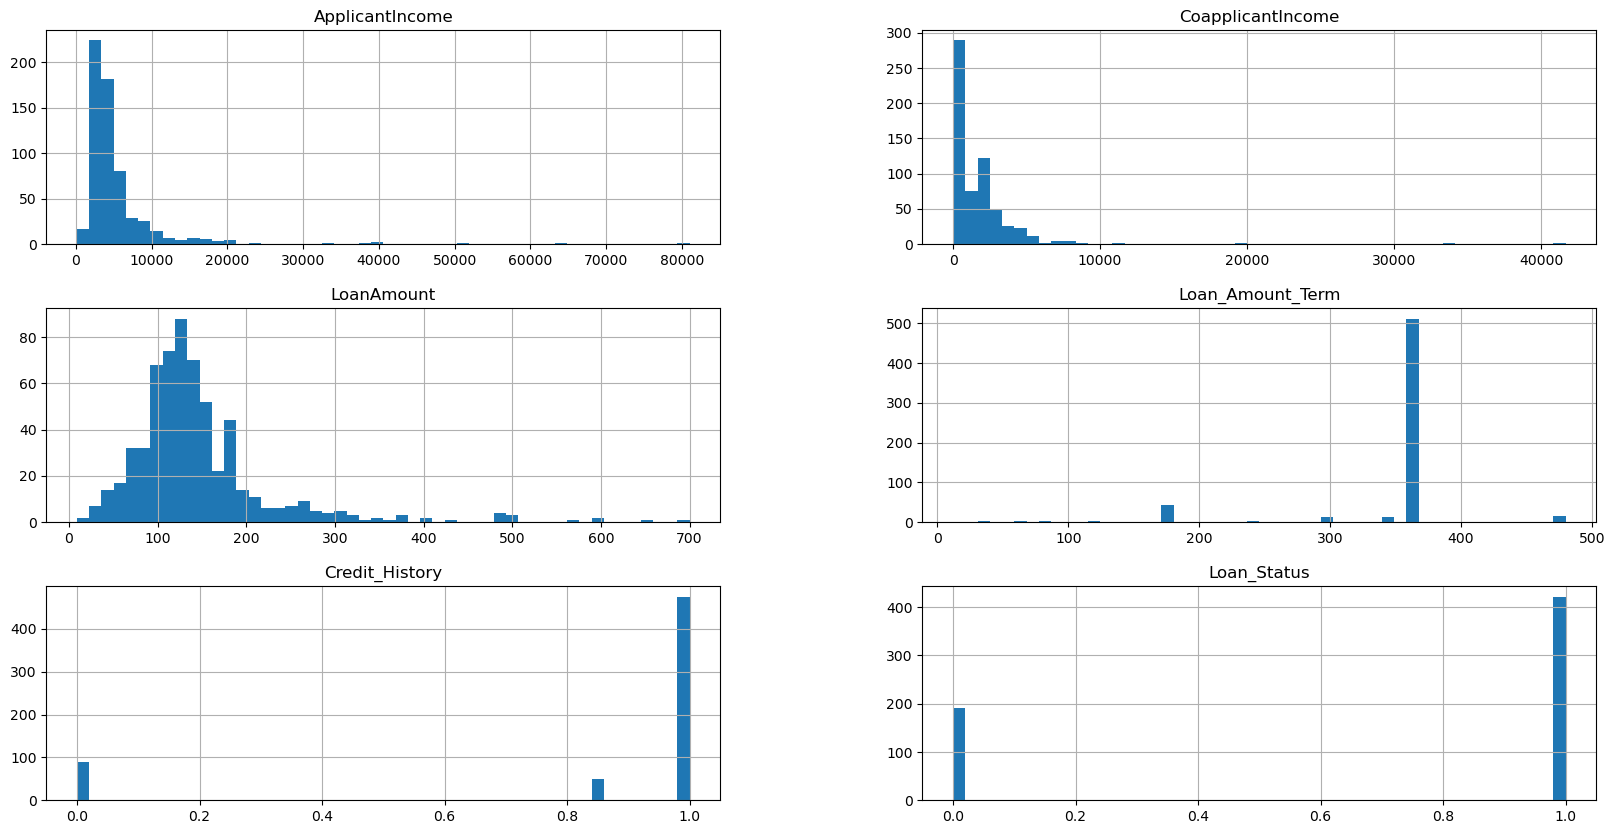

In [78]:
visualize_num_features(df)

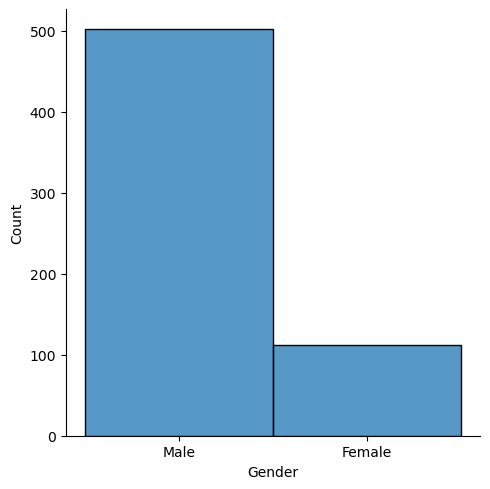

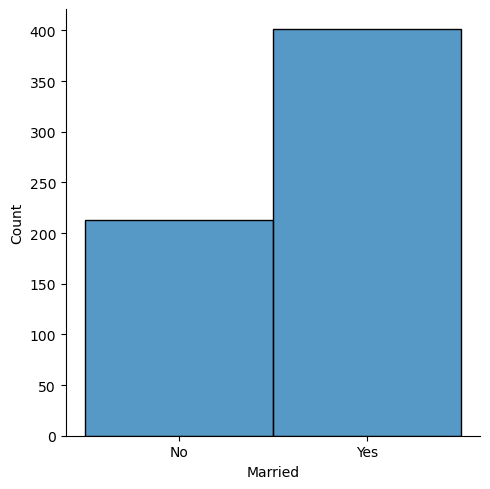

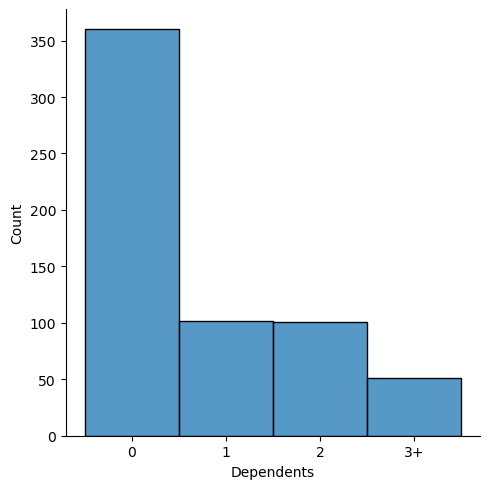

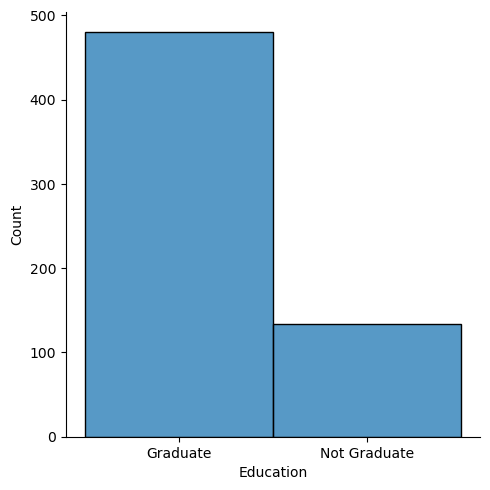

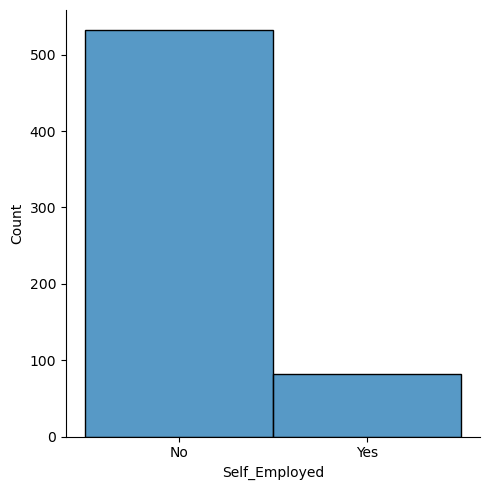

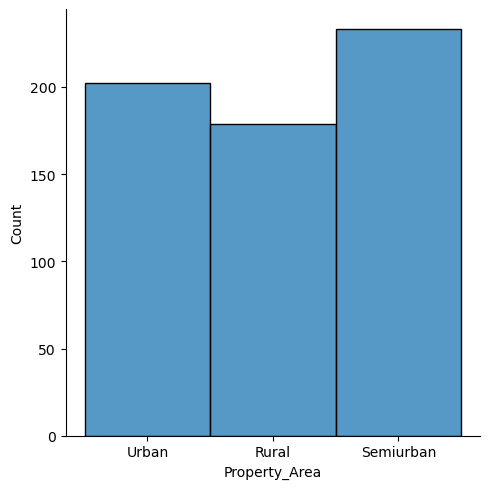

In [79]:
visualize_cat_features(df)

In [80]:
crosstabs(df, 'Loan_Status')

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
Crosstab between Gender & Loan_Status


Loan_Status,0,1
Gender,,
Female,37,75
Male,155,347


Crosstab between Married & Loan_Status


Loan_Status,0,1
Married,,
No,79,134
Yes,113,288


Crosstab between Dependents & Loan_Status


Loan_Status,0,1
Dependents,,
0,113,247
1,36,66
2,25,76
3+,18,33


Crosstab between Education & Loan_Status


Loan_Status,0,1
Education,,
Graduate,140,340
Not Graduate,52,82


Crosstab between Self_Employed & Loan_Status


Loan_Status,0,1
Self_Employed,,
No,166,366
Yes,26,56


Crosstab between Property_Area & Loan_Status


Loan_Status,0,1
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


In [81]:
X,y = split_data_into_X_y(df, 'Loan_Status')

In [82]:
X_train, X_test, y_train, y_test = train_test_split_data(df, 'Loan_Status')

In [83]:
feature_engineer_num_cols(X_train, X_test,'StandardScalar','Loan_Status')

In [84]:
label_encode_cat_cols(X_train, X_test,'LabelEncoder','Loan_Status')

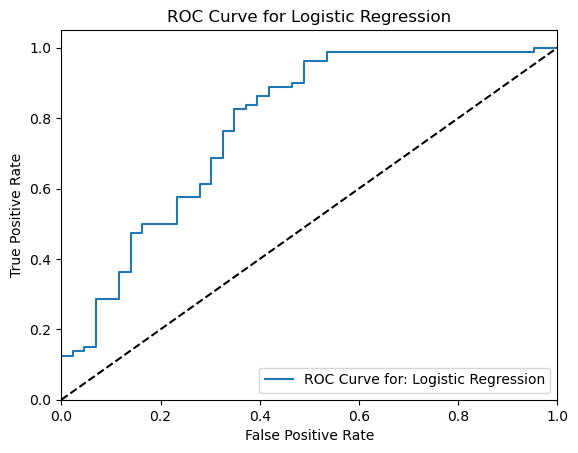

Confusion Matrix for Logistic Regression
[[18 25]
 [ 1 79]]
Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



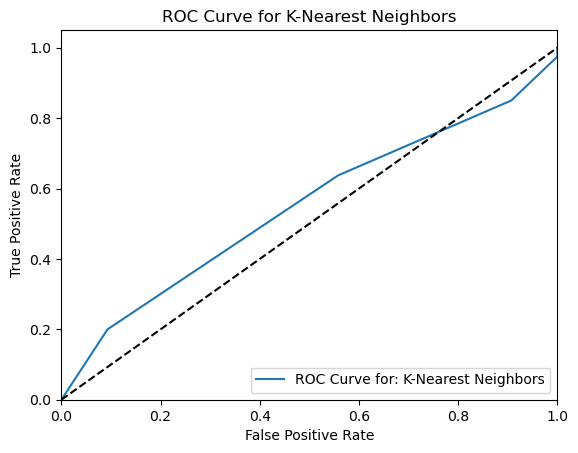

Confusion Matrix for K-Nearest Neighbors
[[ 4 39]
 [12 68]]
Classification Report for K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.25      0.09      0.14        43
           1       0.64      0.85      0.73        80

    accuracy                           0.59       123
   macro avg       0.44      0.47      0.43       123
weighted avg       0.50      0.59      0.52       123



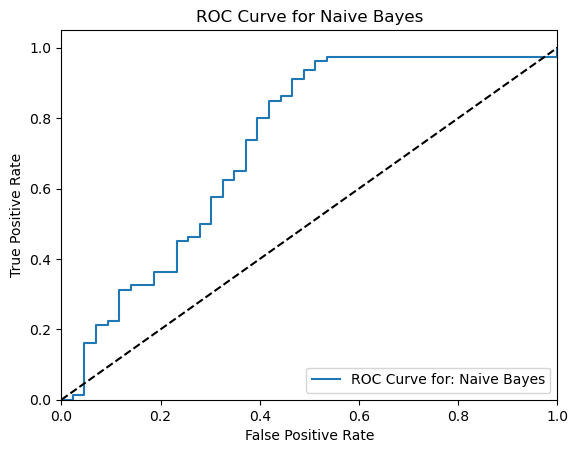

Confusion Matrix for Naive Bayes
[[19 24]
 [ 2 78]]
Classification Report for Naive Bayes
              precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.76      0.97      0.86        80

    accuracy                           0.79       123
   macro avg       0.83      0.71      0.73       123
weighted avg       0.81      0.79      0.77       123



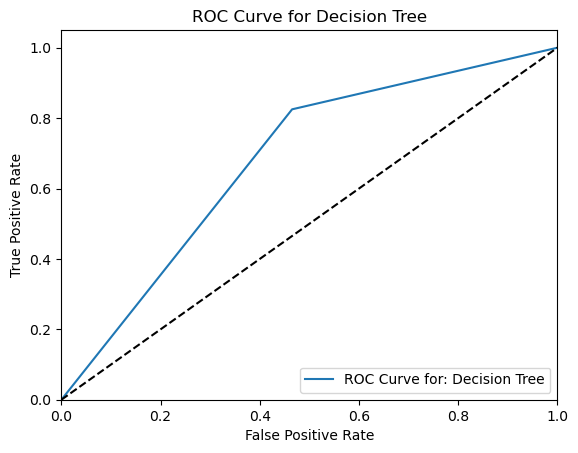

Confusion Matrix for Decision Tree
[[23 20]
 [14 66]]
Classification Report for Decision Tree
              precision    recall  f1-score   support

           0       0.62      0.53      0.57        43
           1       0.77      0.82      0.80        80

    accuracy                           0.72       123
   macro avg       0.69      0.68      0.69       123
weighted avg       0.72      0.72      0.72       123



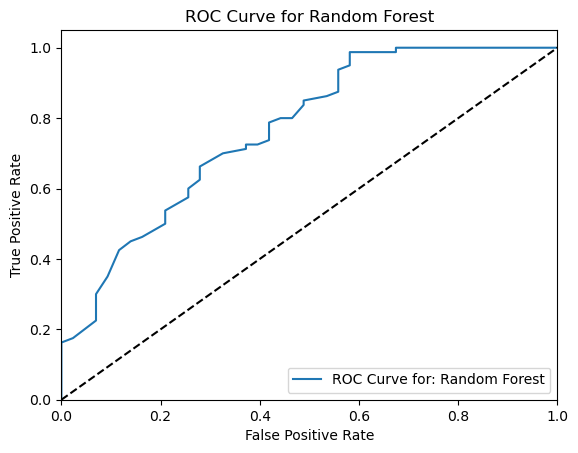

Confusion Matrix for Random Forest
[[18 25]
 [ 4 76]]
Classification Report for Random Forest
              precision    recall  f1-score   support

           0       0.82      0.42      0.55        43
           1       0.75      0.95      0.84        80

    accuracy                           0.76       123
   macro avg       0.79      0.68      0.70       123
weighted avg       0.78      0.76      0.74       123



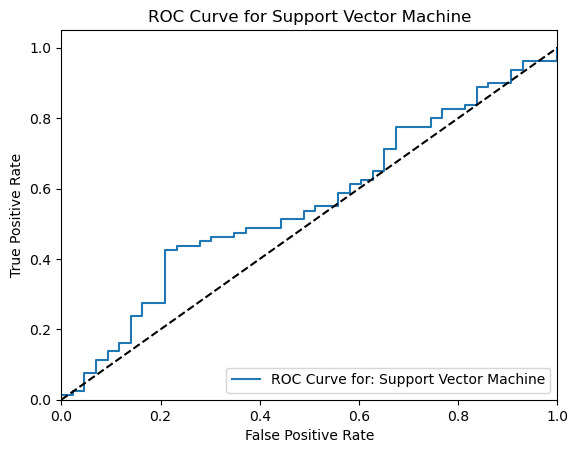

Confusion Matrix for Support Vector Machine
[[ 0 43]
 [ 0 80]]
Classification Report for Support Vector Machine
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.65      1.00      0.79        80

    accuracy                           0.65       123
   macro avg       0.33      0.50      0.39       123
weighted avg       0.42      0.65      0.51       123



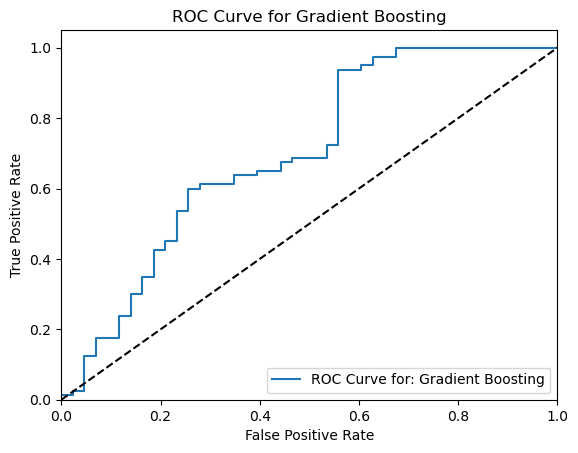

Confusion Matrix for Gradient Boosting
[[19 24]
 [ 7 73]]
Classification Report for Gradient Boosting
              precision    recall  f1-score   support

           0       0.73      0.44      0.55        43
           1       0.75      0.91      0.82        80

    accuracy                           0.75       123
   macro avg       0.74      0.68      0.69       123
weighted avg       0.74      0.75      0.73       123



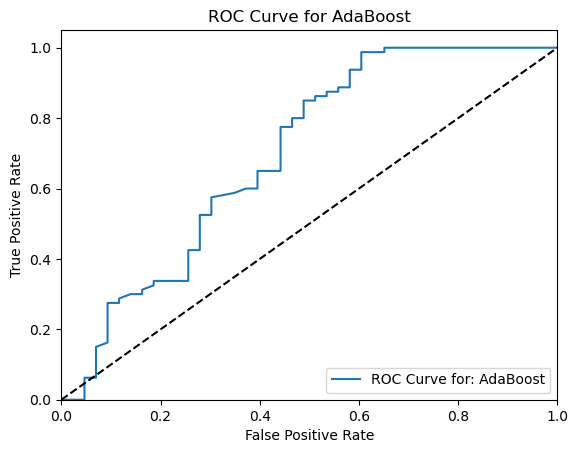

Confusion Matrix for AdaBoost
[[18 25]
 [ 8 72]]
Classification Report for AdaBoost
              precision    recall  f1-score   support

           0       0.69      0.42      0.52        43
           1       0.74      0.90      0.81        80

    accuracy                           0.73       123
   macro avg       0.72      0.66      0.67       123
weighted avg       0.72      0.73      0.71       123



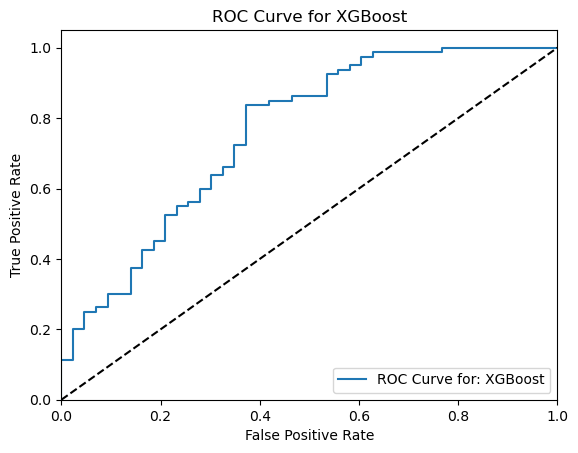

Confusion Matrix for XGBoost
[[20 23]
 [ 6 74]]
Classification Report for XGBoost
              precision    recall  f1-score   support

           0       0.77      0.47      0.58        43
           1       0.76      0.93      0.84        80

    accuracy                           0.76       123
   macro avg       0.77      0.70      0.71       123
weighted avg       0.77      0.76      0.75       123



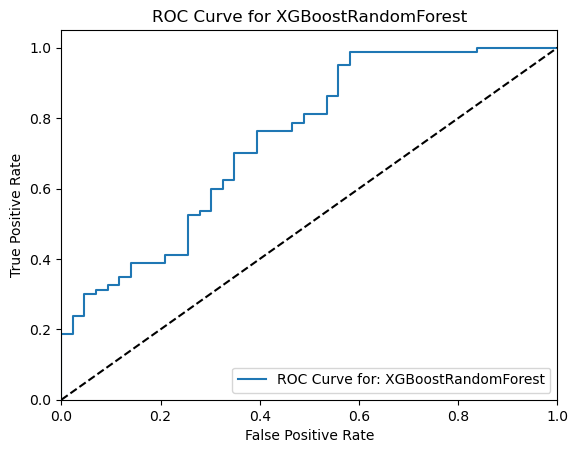

Confusion Matrix for XGBoostRandomForest
[[18 25]
 [ 4 76]]
Classification Report for XGBoostRandomForest
              precision    recall  f1-score   support

           0       0.82      0.42      0.55        43
           1       0.75      0.95      0.84        80

    accuracy                           0.76       123
   macro avg       0.79      0.68      0.70       123
weighted avg       0.78      0.76      0.74       123



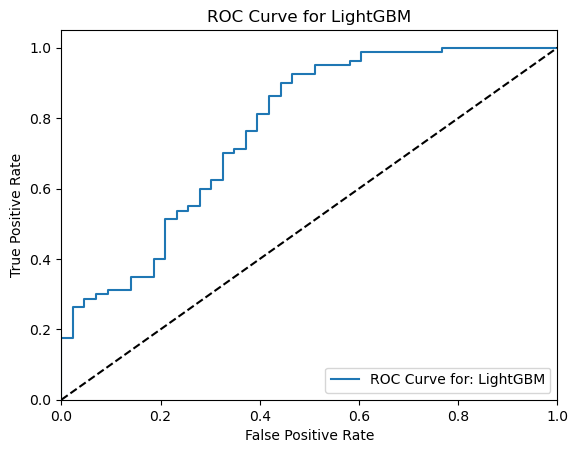

Confusion Matrix for LightGBM
[[23 20]
 [ 8 72]]
Classification Report for LightGBM
              precision    recall  f1-score   support

           0       0.74      0.53      0.62        43
           1       0.78      0.90      0.84        80

    accuracy                           0.77       123
   macro avg       0.76      0.72      0.73       123
weighted avg       0.77      0.77      0.76       123



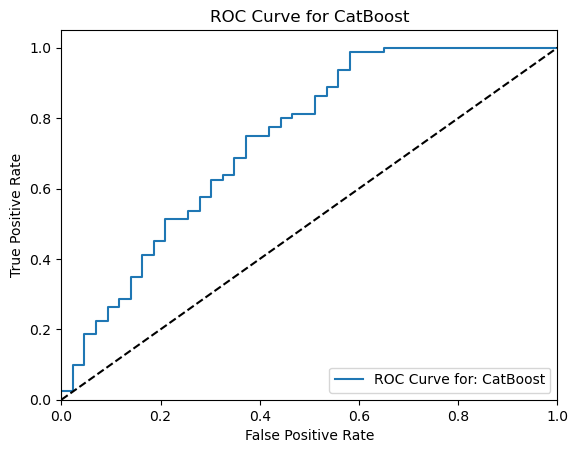

Confusion Matrix for CatBoost
[[18 25]
 [ 2 78]]
Classification Report for CatBoost
              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



,Model,Train Accuracy,Test Accuracy,Test Precision,Test Recall,Test F1 Score,Test ROC AUC
0,Logistic Regression,0.816701,0.788618,0.825253,0.788618,0.761491,0.777616
1,K-Nearest Neighbors,0.737271,0.585366,0.500741,0.585366,0.520425,0.548401
2,Naive Bayes,0.800407,0.788618,0.813669,0.788618,0.765062,0.723837
3,Decision Tree,1.000000,0.723577,0.716464,0.723577,0.718207,0.679942
4,Random Forest,1.000000,0.764228,0.775446,0.764228,0.739819,0.767006
5,Support Vector Machine,0.702648,0.650407,0.423029,0.650407,0.512636,0.555814
6,Gradient Boosting,0.896130,0.747967,0.744953,0.747967,0.729023,0.699128
7,AdaBoost,0.859470,0.731707,0.724802,0.731707,0.711541,0.697384
8,XGBoost,1.000000,0.764228,0.765104,0.764228,0.746506,0.758430
9,XGBoostRandomForest,0.851324,0.764228,0.775446,0.764228,0.739819,0.738663


In [85]:
train_all_models(X_train, X_test, y_train, y_test)

In [86]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
KS(model, X_test, y_test)

,pred_proba_min,pred_proba_max,Event,Non_Event,Event_Rate,Non_Event_Rate,Cum_Event_Rate,Cum_Non_Event_Rate,KS
decile,,,,,,,,,
10,0.95,0.98,10,1,12.50,2.325581,12.50,2.325581,10.174419
9,0.92,0.94,10,2,12.50,4.651163,25.00,6.976744,18.023256
8,0.89,0.91,11,1,13.75,2.325581,38.75,9.302326,29.447674
7,0.85,0.88,9,5,11.25,11.627907,50.00,20.930233,29.069767
6,0.82,0.84,8,3,10.00,6.976744,60.00,27.906977,32.093023
5,0.76,0.81,10,4,12.50,9.302326,72.50,37.209302,35.290698
4,0.66,0.75,8,3,10.00,6.976744,82.50,44.186047,38.313953
3,0.56,0.65,8,5,10.00,11.627907,92.50,55.813953,36.686047
2,0.20,0.54,6,6,7.50,13.953488,100.00,69.767442,30.232558


KS Statistic: 38.31395348837209
